In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
filepath = r"/mnt/c/Users/Parv/Doc/RA/Projects/incomplete_cycles/PBSIM-PacBio-Simulator"

In [36]:
!cd "C:\Users\Parv\Doc\RA\Projects\incomplete_cycles\PBSIM-PacBio-Simulator"

/bin/bash: line 1: cd: C:\Users\Parv\Doc\RA\Projects\incomplete_cycles\PBSIM-PacBio-Simulator: No such file or directory


In [118]:

import os
from utils import get_reference_from_file, read_strands_from_file, read_strands_from_file_alt

sequenced_strands = {}
collected_files = set()

for file in os.listdir(filepath):
    if file[:2] == "sd":
        
        filename = file[:7]

        if filename in collected_files:
            continue

        collected_files.add(filename)

        ref_file = os.path.join(filepath, filename + ".ref")
        fastq_file = os.path.join(filepath, filename + ".fastq")

        ref = get_reference_from_file(ref_file)
        strands = read_strands_from_file_alt(fastq_file)
        sequenced_strands[ref] = strands
        print(f"Collected {ref}")
            

Collected 1c895652-387f-452d-8501-b4bb6b141b10
Collected aeedb587-a0d2-4463-a8cb-d2af4ef4bbdb
Collected 5a64bca5-bdc8-4f03-bcd8-98c586c7c60f
Collected 3fb58c96-5d26-4811-a942-2a3558e727cf
Collected 84817b88-b8e2-4b05-951b-bb52d0b18df2
Collected 74d15b5e-c17e-411f-be20-f74f82a8bee0
Collected f6a3ce13-f592-44dd-b0ee-5ca58768eb1b
Collected 06bbb89a-aa58-4322-b107-2dfa6ad225e8
Collected 2842ca05-6839-4071-90a9-8433fec6fecc
Collected f3f225b4-9c4b-4ab4-b22a-30f045c29893
Collected bb07c7b1-1a0f-49ed-b202-1cb765763edf
Collected 1dad1404-a94c-41e1-a5c6-aaaf856c09e9
Collected 9d5d0c2c-607a-41ed-a186-671f3f4de89d
Collected 2aebddb9-36af-48bd-b247-0d5d6b94930d
Collected e1fa1bc6-43e6-4db9-8c8f-a97ed8dd2831
Collected 06c5efda-7fe1-4dcd-ac68-1547f9509c4e
Collected 14165480-ffa8-4bba-b277-1a684dfb0c40
Collected 70051e9b-72ca-48b1-b828-f57c50e13b02
Collected 8ec2086e-1cfd-4908-9cc2-dae0d1d1dcb8
Collected fe572ab8-cf89-43fa-bb3c-3076d011662a
Collected db3284b9-c0db-4fbd-8f6c-e9add871c743
Collected 6b9

In [119]:
from creating_synthesized_strands_from_strands import get_original_strands
from sequencing import NaiveSequencingModel
import time
from tqdm.notebook import tqdm


ids, coupling_rates, capping_flags, original_strands = get_original_strands()
recovery_percentages = []

for label, coupling_rate, capping_flag, original_strand in (zip(ids, coupling_rates, capping_flags, original_strands)):
    
    print(f"{label} {coupling_rate} {capping_flag}")
    sequenced_strand_repeats = sequenced_strands[label]
    
    startime = time.time()
    sequencing_model = NaiveSequencingModel(strand_length=len(original_strand))
    consensus_strand = sequencing_model.consensus_decoding(sequenced_strand_repeats, original_strand, alignment=True)
    endtime = time.time()
    recovery_percentage = get_recovery_percentage(consensus_strand, original_strand)
    
    print(consensus_strand)
    print(original_strand)
    print(recovery_percentage)
    recovery_percentages.append(recovery_percentage)


1c895652-387f-452d-8501-b4bb6b141b10 8 True
CTGTCCATCTAGTTCCGGTCCCAAGAGATACGGAGACAAGAAAAACCAACTCCCAGATGTTACGCAGGGCAAAGTATATTAATTCACGTCTCATGCTCGTGTGGAGCTTTGGCGCTTGTCCCGTGTCTACGATCAGAAATGTTTGGCGCGTGGGTTACTAGGCTCGGATAAGGAAAACACCAATCTTCATCAGTGACAGC
CTGTCCATCTAGTTCCGGTCCCAAGAGATACGGAGACAAGAAAAACCAACTCCCAGATGTTACGCAGGGCAAAGTATATTAATTCACGTCTCATGCTCGTGTGGAGCTTTGGCGCTTGTCCCGTGTCTACGATCAGAAATGTTTGGCGCGTGGGTTACTAGGCTCGGATAAGGAAAACACCAATCTTCATCAGTGACAGC
1.0
aeedb587-a0d2-4463-a8cb-d2af4ef4bbdb 8 False


KeyboardInterrupt: 

(array([152.,   0.,   0.,   0.,   0.,  89., 326., 203., 309., 525.]),
 array([  1. ,  18.1,  35.2,  52.3,  69.4,  86.5, 103.6, 120.7, 137.8,
        154.9, 172. ]),
 <BarContainer object of 10 artists>)

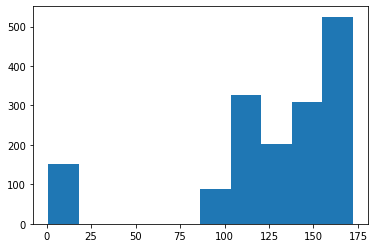

In [115]:
lens = [len(i) for i in sequenced_strand_repeats]
import matplotlib.pyplot as plt

plt.hist(lens)

In [61]:
print(consensus_strand)

CTGTCCATCTAGTTCCGGTCCCAAGAGATACGGAGACAAGAAAAACCAACTCCCAGATGTTACGCAGGGCAAAGTATATTAATTCACGTCTCATGCTCGTGTGGAGCTTTGGCGCTTGTCCCGTGTCTACGATCAGAAATGTTTGGCGCGTGGGTTACTAGGCTCGGATAAGGAAAACACCAATCTTCATCAGTGACAGC


In [62]:
print(original_strand)

CTGTCCATCTAGTTCCGGTCCCAAGAGATACGGAGACAAGAAAAACCAACTCCCAGATGTTACGCAGGGCAAAGTATATTAATTCACGTCTCATGCTCGTGTGGAGCTTTGGCGCTTGTCCCGTGTCTACGATCAGAAATGTTTGGCGCGTGGGTTACTAGGCTCGGATAAGGAAAACACCAATCTTCATCAGTGACAGC


In [63]:
from main import get_recovery_percentage

get_recovery_percentage(consensus_strand, original_strand)

1.0

In [47]:
original_strands

['CTGTCCATCTAGTTCCGGTCCCAAGAGATACGGAGACAAGAAAAACCAACTCCCAGATGTTACGCAGGGCAAAGTATATTAATTCACGTCTCATGCTCGTGTGGAGCTTTGGCGCTTGTCCCGTGTCTACGATCAGAAATGTTTGGCGCGTGGGTTACTAGGCTCGGATAAGGAAAACACCAATCTTCATCAGTGACAGC',
 'GTTCAAATTGCAACCCGGTAAAGACTGCTGGCTAACAATAAGGACACATACATGCTCCGAACGTCCCGTTTATGTCCACGAAAGGGCTGCGTTTAGACTAAGCGGTTCTGTACCCGTCTCATCCTCACGGGCGCGCTTGGGATCACTGTTTGACCTGACAGTTACGCACTAACGTGACTGGTCAATCCCTAATAGTCAGA',
 'TATTTTACTTTGTGAGTTCACATCATCCATTGCGGCGCGACGTAGGAAATCGATGATATTCAACGCCAACTCGCCCTTATACCCCCTACGGCCCATGCGTCTTTAAGATTCTGCTTTGGACGCAGGAAACTTTTTAGAATCTTCACCGAGCCGGTTAGCTTGCACACTTTCCCACGTGATGACGCTACTCGTTCTTATCA',
 'CTCACGATAATTTACTTAGGAATTGTCACCGGTCCGGAGACCCACTAAATGTTTTTAGCGGGGGCACCCACTGTCCGACTACCGCACGTTACTGGCGTAAACACCGGGGTCGCTGCCGGATCGAATCATCTTTAAAAGCCTATACGGACCTTATATGCGTGGGCACGGCAAGGCGCGTTACTTCATGGGCGTACCCCCCC',
 'AAGCTTTGTTCATAGCCCACCCCCCCCGTTATCGATGTCCTAAGTACGAGAGAGTGGGGAGGAATAAGTGCGAGCATCCAATTTCAGAAAGGACCTGCAGTTCAGCGTAGACACACGCGATGAAAAATCACGCTGAGTTCGTTCTACATCCGGGTCCAAAAAACGGTGGGTGCGCCAT

In [14]:
os.listdir()

['.ipynb_checkpoints',
 'creating_synthesis_file.py',
 'creating_synthesized_strands_from_strands.py',
 'dna_storage.py',
 'ecc.py',
 'getting_files.ipynb',
 'main.py',
 'original_strands.txt',
 'reads.txt',
 'sd_0003.fastq',
 'sd_0003.ref',
 'sd_0044.fastq',
 'sd_0044.maf',
 'sd_0044.ref',
 'sequenced_badread.txt',
 'sequencing.py',
 'seq_stat.py',
 'synthesis.py',
 'synthesized.fasta',
 'synthesized_strands.fasta',
 'synthesized_strands.txt',
 'synthesized_strands_2.fasta',
 'utils.py',
 '__pycache__']